In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()

In [3]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

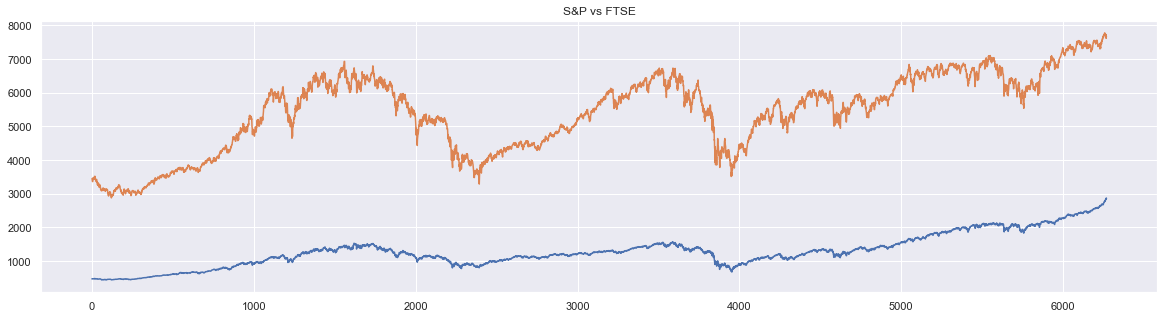

In [7]:
df_comp.spx.plot(figsize = (20,5), title = 'S&P500 Price')
df_comp.ftse.plot(figsize = (20,5), title = 'FTSE100 Price')
plt.title('S&P vs FTSE')
plt.show()

### The Quantile - Quantile plot (QQ plot)
Use to showcase how the data fits the normal distribution

In [8]:
import scipy.stats
import pylab

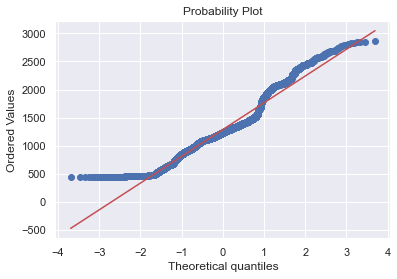

In [9]:
scipy.stats.probplot(df_comp['spx'], plot = pylab)
pylab.show()

# Convert DataFrame into Time Series 

## Date column as date type and index column

In [10]:
df_comp.columns.values

array(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype=object)

In [11]:
df_comp['date'].iloc[0]

'07/01/1994'

In [12]:
df_comp['date'] = pd.to_datetime(df_comp['date'], format = '%d/%m/%Y')

In [13]:
df_comp['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [14]:
df_comp.set_index('date', inplace = True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Add desired frequency

In [16]:
df_comp = df_comp.asfreq('b')

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing values

In [18]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp[pd.isnull(df_comp['spx'])]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


Fill missing values with front, back or mean (best) values

In [20]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill')
df_comp.dax = df_comp.dax.fillna(method = 'bfill')
df_comp.ftse = df_comp.ftse.fillna(value = df_comp.ftse.mean())
df_comp.nikkei = df_comp.ftse.fillna(value = df_comp.nikkei.mean())

In [21]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Delete columns

In [22]:
df_comp['market_values']= df_comp.spx

In [23]:
del df_comp['dax'] , df_comp['spx'], df_comp['nikkei']

In [24]:
df_comp.describe()

,ftse,market_values
count,6277.000000,6277.000000
mean,5422.713545,1288.642547
std,1144.842066,487.868210
min,2876.600000,438.920000
25%,4487.880000,992.715221
50%,5661.880000,1233.761241
75%,6303.300000,1460.250000
max,7778.637689,2872.867839


# Splitting data

In [25]:
df_comp.shape

(6277, 2)

In [26]:
size = int(len(df_comp)*0.8)

In [27]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [28]:
df.tail()

,ftse,market_values
date,,
2013-04-01,6411.74,1562.173837
2013-04-02,6490.66,1570.252238
2013-04-03,6420.28,1553.686978
2013-04-04,6344.11,1559.979316
2013-04-05,6249.77,1553.278930


In [29]:
df_test.head()

,ftse,market_values
date,,
2013-04-08,6276.94,1563.071269
2013-04-09,6313.20,1568.607909
2013-04-10,6387.37,1587.731827
2013-04-11,6416.14,1593.369863
2013-04-12,6384.39,1588.854623


# white noise

In [30]:
wn = np.random.normal(loc = df.market_values.mean(), scale = df.market_values.std(), size = len(df))

In [31]:
df['wn'] = wn

<ipython-input-31-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [32]:
df.describe()

,ftse,market_values,wn
count,5021.000000,5021.000000,5021.000000
mean,5089.539109,1091.651926,1090.379013
std,1016.854515,292.559287,292.814959
min,2876.600000,438.920000,-60.790531
25%,4274.040000,914.620000,894.557942
50%,5266.410000,1144.650000,1089.991197
75%,5917.270000,1316.280729,1288.909835
max,6930.200000,1570.252238,2087.171907


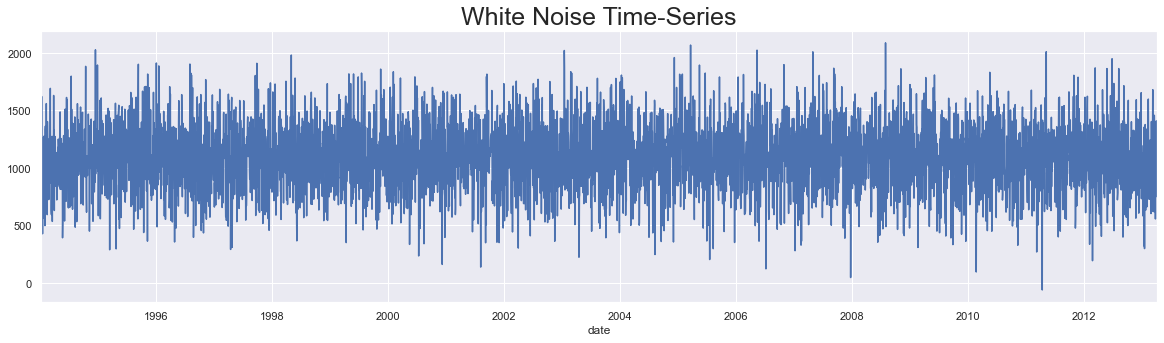

In [33]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size =25)
plt.show()

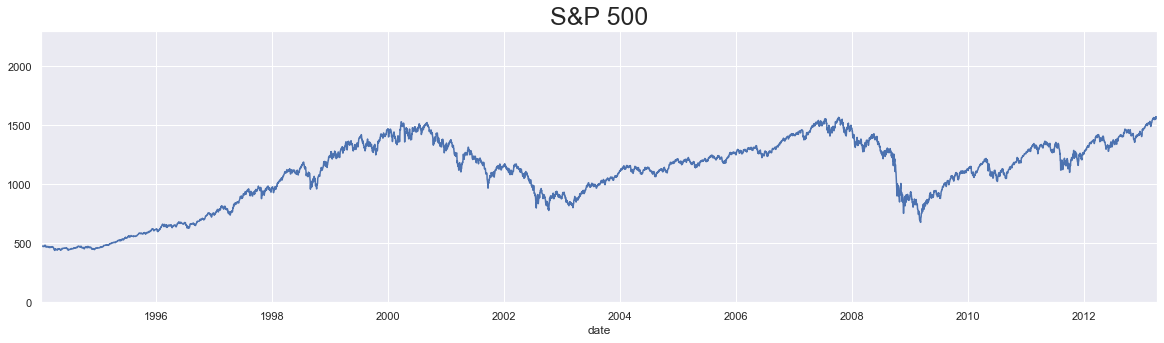

In [34]:
df.market_values.plot(figsize=(20,5))
plt.title("S&P 500", size = 25)
plt.ylim(0,2300)
plt.show()

# Random walk

In [35]:
rw = pd.read_csv('RandWalk.csv')
rw['date'] = pd.to_datetime(rw['date'], format = '%d/%m/%Y', dayfirst = True)
rw.set_index('date', inplace = True)
rw=rw.asfreq('b')

In [36]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [37]:
df['rw'] = rw.price
df.head()

<ipython-input-37-e3d6c4b57795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


,ftse,market_values,wn,rw
date,,,,
1994-01-07,3445.98,469.90,677.125193,1122.139662
1994-01-10,3440.58,475.27,1066.625690,1080.347860
1994-01-11,3413.77,474.13,1621.829866,1082.095245
1994-01-12,3372.02,474.17,1101.970532,1083.639265
1994-01-13,3360.01,472.47,698.175801,1067.146255


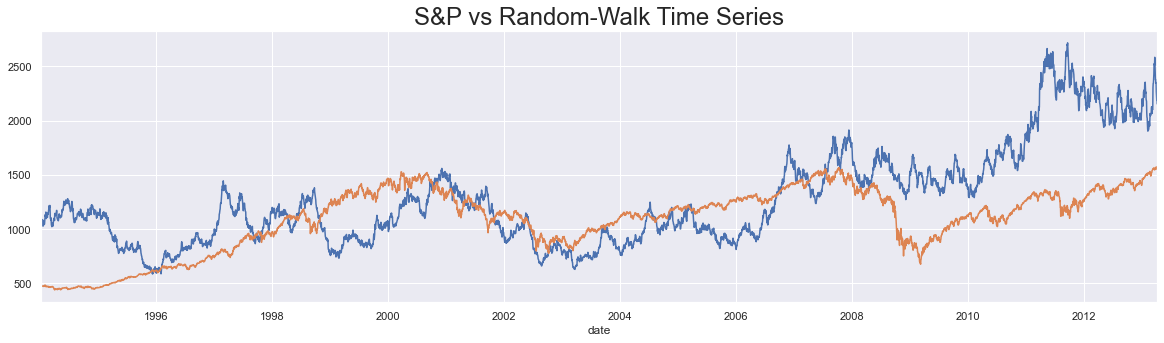

In [38]:
df.rw.plot(figsize=(20,5))
df.market_values.plot()
plt.title("S&P vs Random-Walk Time Series", size = 24)
plt.show()

# Stationary

* Determining weak_form stationarity: Dickey_fuller test
* Ho: Non-stationarity
* test statistic < critical value => stationarity

In [39]:
import statsmodels.tsa.stattools as tst

In [40]:
tst.adfuller(df.market_values)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

* test statistic 
* p-value
* number of lags
* obvervations

In [41]:
tst.adfuller(df.wn)

(-71.26665957335022,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70812.27397643017)

In [42]:
tst.adfuller(df.rw)

(-1.32860739276897,
 0.6159849181617392,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

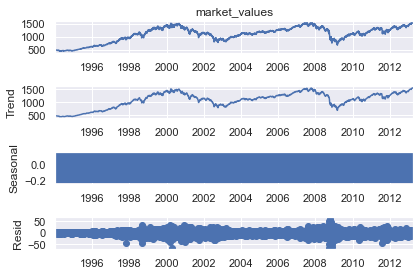

In [44]:
s_dec_additive = seasonal_decompose(df.market_values, model ='additive')
s_dec_additive.plot()
plt.show()

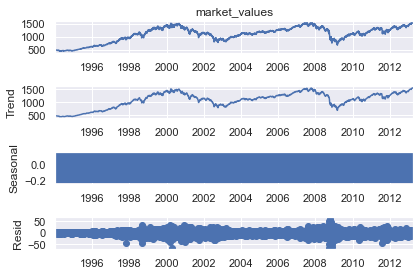

In [45]:
s_dec_multiplicative = seasonal_decompose(df.market_values, model ='multiplicative')
s_dec_additive.plot()
plt.show()

* Trend is similar to observed series because the decompose function uses the previous period values as a trend setter. Or in other words, the current period prices are the best predictor of the next period prices. 
* If we observe seasonal patterns we have other prices as better predictors. For instance, prices from 30 periods ago rather than 1 period ago. 
* The trend part of decomposition explains most of the variability of the data.
* No concrete cyclical pattern by using naive decomposition
* The resiual is the error of the model estimate. The difference between true values and preditions for any period. It varies greatly in 2000 and 2008 as the instability in these years

=> NO SEASONALITY 

# Correlation between past and present values

In [46]:
import statsmodels.graphics.tsaplots as sgt

## Autocorrelation function (ACF)
* Capture the direct and indirect way the lagged affect the original one. 
* Indirect: prices 3 days ago affect prices 2, 1 days ago and in turn affect today's prices. 

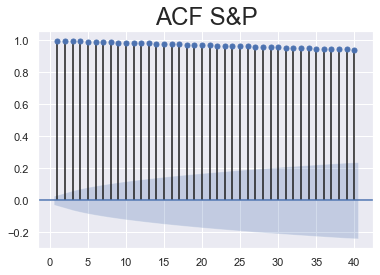

In [47]:
sgt.plot_acf(df.market_values, lags =40, zero = False) #zero to dismiss the autocorrelation of itself
plt.title("ACF S&P", size = 24) # 40 is the optimal lags
plt.show()

* Time dependence in the data
* Blue area is significant. If the point is outside this area, there is autocorrelation at that lagged version
* The greater difference in time, the more unlikely the autocorrelation persists. 
* For instance, today's prices are usually closer to yesterday's prices than the prices a month ago. Therefore, we need to make sure the autocorrelation coefficient in higher lag is sufficient greater to be significantly different from 0. 

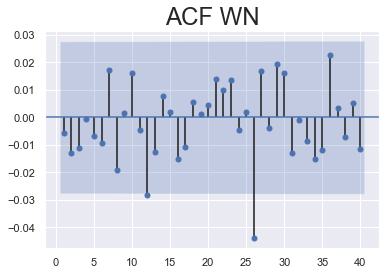

In [48]:
sgt.plot_acf(df.wn, lags =40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

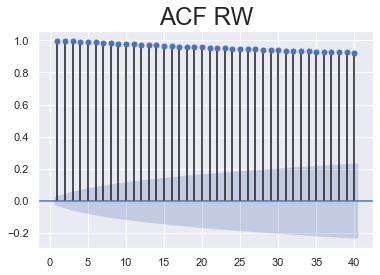

In [49]:
sgt.plot_acf(df.rw, lags =40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

## Partial Autocorrelation Function (PACF)
* Compute only the direct relationship from the lagged version to the original version
* There are many methods to compute PACF, ols: Order of Least Squares 

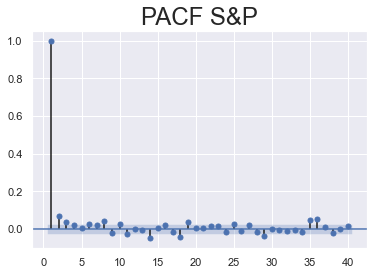

In [50]:
sgt.plot_pacf(df.market_values, lags =40, zero = False, method = 'ols') 
plt.title("PACF S&P", size = 24) 
plt.show()

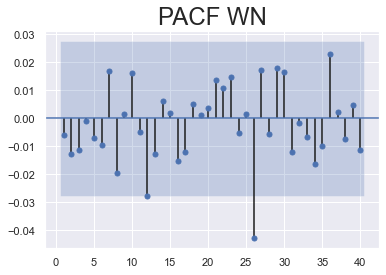

In [51]:
sgt.plot_pacf(df.wn, lags =40, zero = False, method = 'ols') 
plt.title("PACF WN", size = 24) 
plt.show()

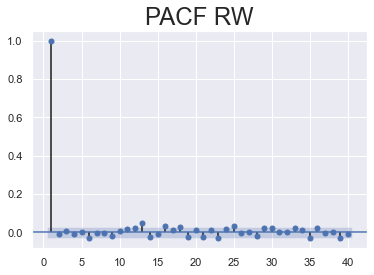

In [52]:
sgt.plot_pacf(df.rw, lags =40, zero = False, method = 'ols') 
plt.title("PACF RW", size = 24) 
plt.show()

# The AR model

In [53]:
from statsmodels.tsa.arima_model import ARMA

## The AR(1) model

In [54]:
model_ar = ARMA(df.market_values, order = (1,0)) # 0 residual = 0
result_ar = model_ar.fit() # fitting the model = findding the most appropriate coefficients

In [55]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Tue, 09 Feb 2021   AIC                          40200.776
Time:                        23:16:13   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1062.8549    228.002      4.662      0.000     615.978    1509.731
ar.L1.market_values     0.9994      0.001   1911.943      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

* std err: the differences between on average, the predictions and the true values
* z : the associated test-statistics for significance
* The last two columns are the critical values for the 95% confident interval. If 0 is not a part of it, we can conclude the coefficients are significant.

## Higher-lags AR models
In general, we opt for higher Log Likelihood and lower information criteria (AIC,BIC,HQIC)

In [56]:
model_ar_2 = ARMA(df.market_values, order = (2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.281
Method:                       css-mle   S.D. of innovations             13.206
Date:                Tue, 09 Feb 2021   AIC                          40178.562
Time:                        23:16:14   BIC                          40204.647
Sample:                    01-07-1994   HQIC                         40187.702
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1069.7156    247.865      4.316      0.000     583.910    1555.521
ar.L1.market_values     0.9300      0.014     68.002      0.000       0.903       0.957
ar.L2.market_values     0.0694      0.014      5.071      0.000       0.043       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2          -14.4042           +0.0000j           14.4042            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
model_ar_3 = ARMA(df.market_values, order = (3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Tue, 09 Feb 2021   AIC                          40174.694
Time:                        23:16:15   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1053.4021    259.502      4.059      0.000     544.788    1562.016
ar.L1.market_values     0.9277      0.014     68.258      0.000       0.901       0.954
ar.L2.market_values     0.0376      0.019      1.989      0.047       0.001       0.075
ar.L3.market_values     0.0342      0.014      2.424      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0504           -5.3037j            5.4067           -0.2811
AR.3           -1.0504           +5.3037j            5.4067            0.2811
-----------------------------------------------------------------------------
"""

In [58]:
model_ar_4 = ARMA(df.market_values, order = (4,0))
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 09 Feb 2021   AIC                          40174.512
Time:                        23:16:17   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.223
                         - 04-05-2013                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1046.7715    267.344      3.915      0.000     522.787    1570.756
ar.L1.market_values     0.9269      0.014     68.616      0.000       0.900       0.953
ar.L2.market_values     0.0368      0.019      1.953      0.051      -0.000       0.074
ar.L3.market_values     0.0148      0.019      0.771      0.441      -0.023       0.053
ar.L4.market_values     0.0209      0.014      1.478      0.139      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9298           -0.0000j            3.9298           -0.5000
AR.3            1.1089           -3.3114j            3.4921           -0.1986
AR.4            1.1089           +3.3114j            3.4921            0.1986
-----------------------------------------------------------------------------
"""

# Log-likelihood Ratio (LLR) test

In [59]:
from scipy.stats.distributions import chi2

In [60]:
def LLR_test(mod_1, mod_2, DF = 1): # DF: degree of freedom
    L1 = mod_1.fit().llf # fit the model and store their log-likelihood in variables
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1)) # test-statistics
    p = chi2.sf(LR,DF).round(3) # p-value
    return p

# Comparing Higher-Lag AR models 

In [61]:
LLR_test(model_ar, model_ar_2) # the difference in log-likelihood is significant => opt for more complex model

0.0

In [62]:
model_ar_2 = ARMA(df.market_values, order = (2,0))
result_ar_2 = model_ar_2.fit()
print(result_ar_2.summary())
print("LLR_test p-value: "+ str(LLR_test(model_ar, model_ar_2)))

                              ARMA Model Results                              
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.281
Method:                       css-mle   S.D. of innovations             13.206
Date:                Tue, 09 Feb 2021   AIC                          40178.562
Time:                        23:16:19   BIC                          40204.647
Sample:                    01-07-1994   HQIC                         40187.702
                         - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1069.7156    247.865      4.316      0.000     583.910    1555.521
ar.L1.market_values     0.9300      0.014     68.002      0.000       0.903       0.957
ar.L2.market_val

In [63]:
model_ar_3 = ARMA(df.market_values, order = (3,0))
result_ar_3 = model_ar_3.fit()
print(result_ar_3.summary())
print("LLR_test p-value: "+ str(LLR_test(model_ar_2, model_ar_3))) 

                              ARMA Model Results                              
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Tue, 09 Feb 2021   AIC                          40174.694
Time:                        23:16:21   BIC                          40207.301
Sample:                    01-07-1994   HQIC                         40186.120
                         - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1053.4021    259.502      4.059      0.000     544.788    1562.016
ar.L1.market_values     0.9277      0.014     68.258      0.000       0.901       0.954
ar.L2.market_val

In [64]:
model_ar_4 = ARMA(df.market_values, order = (4,0)) # no significantly different => choose the simpler model
result_ar_4 = model_ar_4.fit()
print(result_ar_4.summary())
print("LLR_test p-values: "+ str(LLR_test(model_ar_3, model_ar_4))) 

                              ARMA Model Results                              
Dep. Variable:          market_values   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Tue, 09 Feb 2021   AIC                          40174.512
Time:                        23:16:24   BIC                          40213.640
Sample:                    01-07-1994   HQIC                         40188.223
                         - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1046.7715    267.344      3.915      0.000     522.787    1570.756
ar.L1.market_values     0.9269      0.014     68.616      0.000       0.900       0.953
ar.L2.market_val

## Make sure adding 2 addtional lags is worth it. Passing the degree of freedom to 2
=> Because of p-value => the complex model yield a significant greater log-likelihood

In [65]:
print("LLR_test p-values: "+ str(LLR_test(model_ar, model_ar_3, DF = 2))) 

LLR_test p-values: 0.0


# The Dickey-Fuller (DF) test

In [66]:
tst.adfuller(df.ftse)

(-1.9113171140372958,
 0.32675605562656873,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 55903.98193294769)

* |test statistics| < |critical value|
* Extract from a non-stationary process
* We should not rely on AR models to make perdictions

=> Transform the dataset to fit the stationary assumptions

# Using returns
the % change between the two consecutive periods

In [71]:
df['return_ftse'] = df.ftse.pct_change(1).mul(100)
df = df.iloc[1:]

In [72]:
tst.adfuller(df['return_ftse'])

(-12.749327447673815,
 8.602366398669248e-24,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 16658.456896638447)

* Return_ftse is stationary

# ACF and PACF for returns

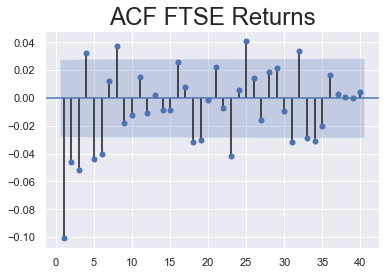

In [69]:
sgt.plot_acf(df['return_ftse'], lags =40, zero = False)
plt.title("ACF FTSE Returns", size = 24)
plt.show()

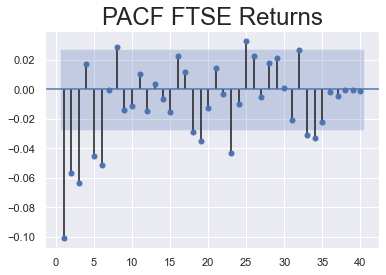

In [70]:
sgt.plot_pacf(df['return_ftse'], lags =40, zero = False, method = 'ols') 
plt.title("PACF FTSE Returns", size = 24) 
plt.show()